<a href="https://colab.research.google.com/github/aktrikx/DSprojects/blob/main/Grocery_sales_machinehack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import time
import xgboost 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import StratifiedKFold  #for classifier
from sklearn.model_selection import KFold #for regression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import math   # yep! going to a bit of maths later!!
from scipy import stats as st
from sklearn.metrics import confusion_matrix

def plot1():
    
  # Predict

  pred1 = model.predict(x_train)
  pred = model.predict(x_test)
  
  # Measure MSE error.
  print("For Train Model")  
  score = metrics.mean_squared_error(y_train,pred1)
  print("Final score (MSE): {}".format(score))
  # Measure RMSE error.  RMSE is common for regression.
  score = np.sqrt(metrics.mean_squared_error(y_train,pred1))
  print("Final score (RMSE): {}".format(score))
  print(metrics.r2_score(y_train,pred1))

  print("For Test Model")
  #Confusion matrix
  # print(confusion_matrix(y_test, pred, labels=None, sample_weight=None, normalize=None))
  # Predict

  # Measure MSE error.  
  score = metrics.mean_squared_error(y_test,pred)
  print("Final score (MSE): {}".format(score))
  # Measure RMSE error.  RMSE is common for regression.
  score = np.sqrt(metrics.mean_squared_error(y_test,pred))
  print("Final score (RMSE): {}".format(score))
  print(metrics.r2_score(y_test,pred))


  fig = plt.figure()
  ax1 = fig.add_subplot(111)

  ax1.scatter(y_train,pred1, s=10, c='b', label='Train Data')
  ax1.scatter(y_test,pred, s=10, c='r', label='Test Data')
  plt.xlabel('True values')
  plt.ylabel('Predictions')
  plt.legend(loc='upper left');
  plt.show()

def missing(self):  
  missing= self.isnull().sum()
  missing=(missing[missing>0]).sort_values(ascending=False)
  return missing
  
# sub=pd.DataFrame({'id':test1['id'],'num_orders':[int(round(x)) for x in y_pred]})
# train=pd.read_csv('/content/drive/My Drive/food/train.csv')
# sub.to_csv('/content/drive/My Drive/food/sub_randomf9782.csv',index=False)
# C:\Users\welcome\Desktop\Grocery_Sales_ParticipantsData\Train.csv

In [ ]:
train=pd.read_csv('/content/drive/My Drive/Grocery_Sales/Train.csv')
test=pd.read_csv('/content/drive/My Drive/Grocery_Sales/Test.csv')
sample=pd.read_excel('/content/drive/My Drive/Grocery_Sales/Sample_Submission.xlsx')
# train1=train
train1=train[-200:]
train1['Day']=train1['Day']%7
train2=np.array(train1['Day']).reshape(-1,1)
test1=test
test1['Day']=test1['Day']%7
test1=np.array(test).reshape(-1,1)
target=np.array(train1['GrocerySales']).reshape(-1,1)
#Using scalar since data has only one feature
scaler1 = StandardScaler()
scaler2 = StandardScaler()
scaler3 = StandardScaler()
train3 = scaler1.fit_transform(pd.DataFrame(train2))
target1 = scaler2.fit_transform(pd.DataFrame(target))
test2 = scaler3.fit_transform(pd.DataFrame(test1))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train2,target, test_size=0.2)

In [ ]:
#Random forest
model=RandomForestRegressor()      
model.fit(x_train,y_train)
plot1()

In [ ]:
y_pred=model.predict(test1)
# y_pred=scaler2.inverse_transform(X, copy=None)
sub=pd.DataFrame({'GrocerySales':y_pred})
sub.head()
sub.tail(20)

In [ ]:
sub.to_excel('/content/drive/My Drive/Grocery_Sales/groranfclasslast100.xlsx',index=False)

In [ ]:
#Gradient booster
gradreg=GradientBoostingRegressor(max_depth=3,n_estimators=2000,learning_rate=0.009)
model=gradreg.fit(x_train,y_train)
plot1()

In [ ]:
y_pred=model.predict(test1)
# y_pred=scaler2.inverse_transform(X, copy=None)

sub=pd.DataFrame({'GrocerySales':y_pred})
sub.head()

In [ ]:
sub.to_excel('/content/drive/My Drive/Grocery_Sales/groranf81.xlsx',index=False)

In [ ]:
#xgboost 
xg=xgboost.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.01, max_depth = 5, alpha = 10, n_estimators = 2000)      
model=xg.fit(x_train,y_train)
plot1()

In [ ]:
#MLP REGRESSOR

In [ ]:
model = MLPRegressor(hidden_layer_sizes=(100,200,300,400),
                                 tol=1e-2, max_iter=1000, random_state=600,activation='relu',solver='adam',
                                 early_stopping=True,learning_rate='adaptive', learning_rate_init=0.01)
model.fit(x_train,y_train)
plot1()

In [ ]:
#linear model
# Now to set up the linear regression model
# Create linear regression object
model = linear_model.LinearRegression(fit_intercept=True)
# ... then fir it
model.fit(x_train,y_train)
plot1()

In [ ]:
y_pred=model.predict(test1)
# y_pred=scaler2.inverse_transform(X, copy=None)
y_pred
# sub=pd.DataFrame({'GrocerySales':[round(t,2) for t in y_pred.flatten()]})
# sub.head()
# # y_pred.tolist()
# model.predict(x_test)

In [ ]:
sub.to_excel('/content/drive/My Drive/Grocery_Sales/grolin.xlsx',index=False)

In [ ]:
test.head()

,Day
0,0
1,1
2,2
3,3
4,4


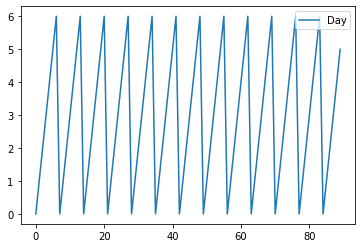

In [ ]:
test.plot()

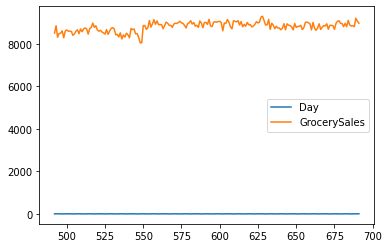

In [ ]:
train[-200:].plot()

In [ ]:
train1['Day'].unique()

array([3, 4, 5, 6, 0, 1, 2])

In [ ]:
train['Day']=pd.date_range('2018/01/01 00:00:00', periods=len(train['Day']), freq='D')
# train.set_index('Day', inplace=True)
# train.index = pd.to_datetime(train.index)
train.head()

,Day,GrocerySales
0,2018-01-01,8418.59
1,2018-01-02,8447.47
2,2018-01-03,8336.49
3,2018-01-04,8579.17
4,2018-01-05,8524.31


In [ ]:
test['Day']=pd.date_range('2019-11-24 00:00:00', periods=len(test['Day']), freq='D')
# test.set_index('Day', inplace=True)
# test.index = pd.to_datetime(test.index)

test.head()

,Day
0,2019-11-24
1,2019-11-25
2,2019-11-26
3,2019-11-27
4,2019-11-28


In [ ]:
for df in [train,test]:
  df["day"] = df['Day'].map(lambda x: x.day)
  df["month"] = df['Day'].map(lambda x: x.month)
  df["year"] = df['Day'].map(lambda x: x.year)  

In [ ]:
# train.set_index('Day', inplace=True)
# train.index = pd.to_datetime(train.index)
# test.set_index('Day', inplace=True)
# test.index = pd.to_datetime(test.index)

In [ ]:
train.drop('Day',axis=1,inplace=True)
train.columns

Index(['GrocerySales', 'day', 'month', 'year'], dtype='object')

In [ ]:
test.drop('Day',axis=1,inplace=True)
test.columns

Index(['day', 'month', 'year'], dtype='object')

In [ ]:
target=train['GrocerySales']
train1=train[['day', 'month', 'year']]
train1['day']=train1['day']%7
test1=test
test1['day']=test1['day']%7
train1=train1[-200:]
# train1
# train2
train1
# target

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,day,month,year
492,1,5,2019
493,2,5,2019
494,3,5,2019
495,4,5,2019
496,5,5,2019
...,...,...,...
687,5,11,2019
688,6,11,2019
689,0,11,2019
690,1,11,2019


In [ ]:
from scipy.stats import zscore
# Standardize ranges
for x in train1: 
  train1[x] = zscore(train1[x])
  test1[x] = zscore(test1[x])
train1.head()
# target.head()

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


,day,month,year
492,-0.971606,-1.567207,NaN
493,-0.458885,-1.567207,NaN
494,0.053836,-1.567207,NaN
495,0.566557,-1.567207,NaN
496,1.079278,-1.567207,NaN


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train1,target, test_size=0.2)

[16:16:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
For Train Model
Final score (MSE): 101680.3059133113
Final score (RMSE): 318.87349515648253
0.4402144920326603
For Test Model
Final score (MSE): 105856.65717971907
Final score (RMSE): 325.3562004629988
0.44537682369098053


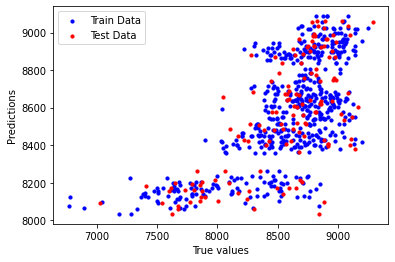

In [ ]:
# xgboost 
xg=xgboost.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 200)      
model=xg.fit(x_train,y_train)
plot1()

For Train Model
Final score (MSE): 51012.5823646519
Final score (RMSE): 225.85965191829172
0.7191579620534556
For Test Model
Final score (MSE): 119041.0837094865
Final score (RMSE): 345.0233089364927
0.3762986125083069


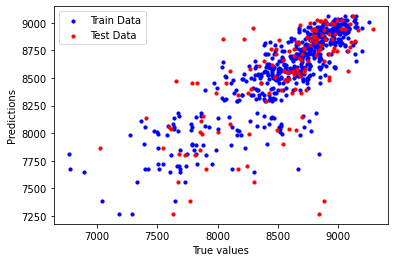

In [ ]:
# RandomForestRegressor
model=RandomForestRegressor(n_estimators=300)      
model.fit(x_train,y_train)
plot1()

In [ ]:
y_pred=model.predict(test1)
# y_pred=scaler2.inverse_transform(X, copy=None)
sub=pd.DataFrame({'GrocerySales':y_pred})
sub.head()

,GrocerySales
0,8083.203703
1,8065.574857
2,8026.941592
3,7807.511568
4,7845.386113


In [ ]:
len(sub)

90

For Train Model
Final score (MSE): 51332.8957636085
Final score (RMSE): 226.56764059240345
0.7173945251997492
For Test Model
Final score (MSE): 119001.52054285548
Final score (RMSE): 344.9659701229318
0.3765058989438165


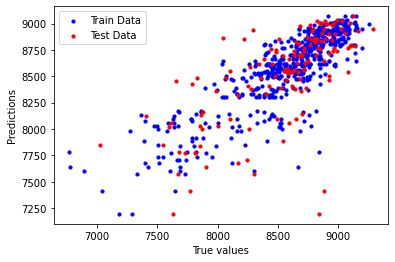

In [ ]:
# Gradientbooster
gradreg=GradientBoostingRegressor(max_depth=3,n_estimators=600,learning_rate=0.9)
model=gradreg.fit(x_train,y_train)
plot1()

In [ ]:
y_pred=model.predict(test1)
# y_pred=scaler2.inverse_transform(X, copy=None)
sub=pd.DataFrame({'GrocerySales':y_pred})
sub.head()

,GrocerySales
0,8095.582516
1,8056.959567
2,8031.124996
3,7773.630557
4,7838.255099


In [ ]:
sub.to_excel('/content/drive/My Drive/Grocery_Sales/grogrebo.xlsx',index=False)